<a href="https://colab.research.google.com/github/xvarc/Databases/blob/master/Gdrive%20dl%20version%20StyleGAN3-Toolkit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#StyleGAN3

#Lucid Stylegan3 models evaluation

This basic colab notebook is to try out the **[lucid stylegan3 datasets and models](https://github.com/edstoica/lucid_stylegan3_datasets_models)** collection.

This notebook is derived from [here](https://colab.research.google.com/drive/1BXNHZBai-pXtP-ncliouXo_kUiG1Pq7M?usp=sharing#scrollTo=WVF2P1OlT92b). 

<!--
**[UPD 18.10.2021]** Added ThisSneakersDoesn'tExist model by [@stan_vossen](https://twitter.com/stan_vossen)  +  seems like [@l4rz](https://twitter.com/l4rz) killed the model for cosplay

[UPD 17.10.2021] Added Music Video Generation (originally inspired by [this tweet](https://twitter.com/hexorcismos/status/1449032666574213125?s=20))

[UPD 14.10.2021] Added Cosplay Faces trained by [@l4rz](https://twitter.com/l4rz)-->

In [1]:
#@title Install System
#@markdown play only once (ignore that memory warning)
from IPython.display import clear_output

!git clone https://github.com/NVlabs/stylegan3.git
%cd stylegan3
!wget -O mini.sh https://repo.anaconda.com/miniconda/Miniconda3-py38_4.8.2-Linux-x86_64.sh
!chmod +x mini.sh
!bash ./mini.sh -b -f -p /usr/local
!conda install -q -y --prefix /usr/local jupyter
!python -m ipykernel install --name "py38" --user
!pip install click -q
!pip install numpy -q
!pip install pillow -q
!pip install torch -q
!pip install scipy -q
!pip install Ninja -q
!pip install imageio -q
!pip install imageio-ffmpeg -q
!pip install youtube-dl -q
clear_output()


In [14]:
#@title Select model 
#@markdown (replay this when you change selection)
modellink = 'test'
model = "scifi city - 256 - step 210" #@param ["mechanical devices from the future - 256 - step 29", "flowers - 256 - step 69", "alien sunglases - 256 - step 38", "forest daemons - 256 - step 18", "scifi city - 256 - step 210", "scifi spaceship - 256 - step 162", "yellow alien - 512 - step 236"]
if model == 'mechanical devices from the future - 256 - step 29':
   modellink = 'https://www.dropbox.com/s/v2oie53cz62ozvu/network-snapshot-000029.pkl?dl=1'
if model == 'flowers - 256 - step 69':
   modellink = 'https://www.dropbox.com/s/o33lhgnk91hstvx/network-snapshot-000069.pkl?dl=1'
if model == 'alien sunglases - 256 - step 38':
   modellink = 'https://www.dropbox.com/s/vhwghutjz6xccf9/network-snapshot-000074.pkl?dl=1'
if model == 'forest daemons - 256 - step 18':
   modellink = 'https://www.dropbox.com/s/26muctr2eq4br6l/network-snapshot-000018.pkl?dl=1'
if model == 'scifi city - 256 - step 210':
   modellink = 'https://www.dropbox.com/s/1kfsmlct4mriphc/network-snapshot-000210.pkl?dl=1'
if model == 'scifi spaceship - 256 - step 162':
   modellink = 'https://www.dropbox.com/s/02br3mjkma1hubc/network-snapshot-000162.pkl?dl=1'
if model == 'yellow alien - 512 - step 236':
   modellink = 'https://www.dropbox.com/s/yzraojzmg2kybjx/network-snapshot-000236.pkl?dl=1'

Loading networks from "https://www.dropbox.com/s/1kfsmlct4mriphc/network-snapshot-000210.pkl?dl=1"...
Generating image for seed 1346 (0/1) ...
Setting up PyTorch plugin "bias_act_plugin"... Done.
Setting up PyTorch plugin "filtered_lrelu_plugin"... Done.


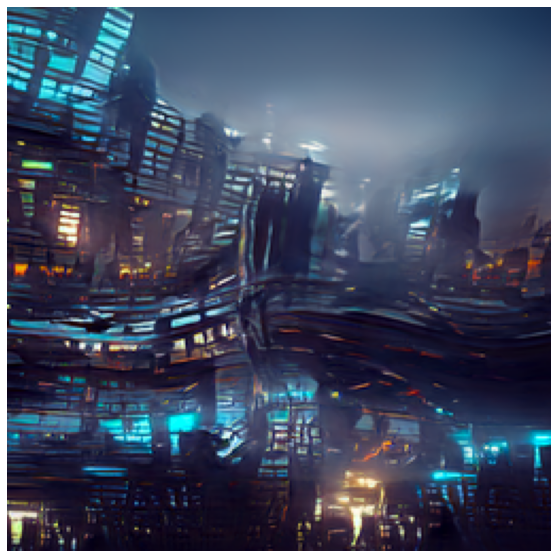

In [15]:
#@title Generate an image

seed = 1346 #@param {type:"slider", min:0, max:9999, step:1}

# Generate an image using pre-trained model 
!python gen_images.py --outdir=out --trunc=1 \
 --seeds=$seed --network=$modellink
 
import matplotlib.pyplot as plt
from PIL import Image

plt.figure(figsize=(10,10))
img = Image.open('/content/stylegan3/out/seed%04d.png' % seed);
plt.imshow(img);
plt.axis('off');

In [ ]:
#@title Generate an interpolation video
%cd /content/stylegan3

#@markdown Select Seeds (keyframes):
start_seed =  32#@param {type:"number"}
stop_seed = 58 #@param {type:"number"}
#@markdown you like to generate a video grid?
n_cols =  1#@param {type:"number"}
n_rows = 1 #@param {type:"number"}

# #@markdown How many key frames to have?
# num_keyframes = 3 #@param {type:"number"}
num_keyframes = 3

#@markdown How many frames for interpolation between each seed?
w_frames =  500#@param {type:"number"}

#@markdown Total length in frames is `num_keyframes`*`w_frames`

assert stop_seed > start_seed, 'Stop_seed should be larger then start_seed'

if model == "stylegan2-cosplay-faces-512x512-px":
    baselink = 'https://l4rz.net/'
    model = 'cosplayface-snapshot-004000-18160-FID367.pkl'

if model == 'sneakers':
    if 'sneaksnap.pkl' not in os.listdir('/content/stylegan3'):
        !gdown --id 1ReK9P4dkkClvpswdSuew35xCx2xjVsQa
    baselink = '/content/stylegan3/'
    model = 'sneaksnap.pkl'

# Render a  grid of interpolations for seeds N through K.
!python gen_video.py --output=lerp.mp4 --trunc=1 --seeds=$start_seed-$stop_seed --grid={n_rows}x{n_cols} \
    --network=$modellink \
    --w-frames=$w_frames

from IPython.display import HTML
from base64 import b64encode
mp4 = open('lerp.mp4','rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML("""
<video width=400 controls>
      <source src="%s" type="video/mp4">
</video>
<i>right click and "save video" for download</i>
""" % data_url)

/content/stylegan3
Loading networks from "https://www.dropbox.com/s/1kfsmlct4mriphc/network-snapshot-000210.pkl?dl=1"...
Setting up PyTorch plugin "bias_act_plugin"... Done.
Setting up PyTorch plugin "filtered_lrelu_plugin"... Done.
 17% 2349/13500 [02:02<09:38, 19.27it/s]

In [6]:
# @title 
# # work in progress
# # make visualizer
# # stop looping, start parallelizing
# # Clone Real-ESRGAN and enter the Real-ESRGAN
# !git clone https://github.com/xinntao/Real-ESRGAN.git
# %cd Real-ESRGAN
# # Set up the environment
# !pip install --upgrade basicsr
# # !pip install facexlib
# # !pip install gfpgan
# # !pip install -r requirements.txt
# # !python setup.py develop
# # # Download the pre-trained model
# # !wget https://github.com/xinntao/Real-ESRGAN/releases/download/v0.1.0/RealESRGAN_x4plus.pth -P experiments/pretrained_models

In [ ]:

!cp 'lerp.mp4' /content/drive/MyDrive/gen_art/ 